# Mai Vu - Methods 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1. Read and preprocessing data

In [2]:
#Read data from the file and assign its header
header = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class']
X = pd.read_csv('column_3C.dat', sep = ' ', index_col = None, header = None, names = header)
X.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
39,52.42,19.01,35.87,33.41,116.56,1.69,DH
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
190,43.72,9.81,52.00,33.91,88.43,40.88,SL
186,81.08,21.26,78.77,59.83,90.07,49.16,SL
78,67.41,17.44,60.14,49.97,111.12,33.16,SL
63,77.69,21.38,64.43,56.31,114.82,26.93,SL
214,45.70,10.66,42.58,35.04,130.18,-3.39,NO
32,44.94,17.44,27.78,27.49,117.98,5.57,DH
56,43.35,7.47,28.07,35.88,112.78,5.75,DH
62,44.53,9.43,52.00,35.10,134.71,29.11,SL


In [3]:
print('Shape =', X.shape)
X.describe().round(4)

Shape = (310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.0000,310.0000,310.0000,310.0000,310.0000,310.0000
mean,60.4965,17.5429,51.9307,42.9539,117.9205,26.2967
std,17.2361,10.0081,18.5538,13.4227,13.3176,37.5589
min,26.1500,-6.5500,14.0000,13.3700,70.0800,-11.0600
25%,46.4325,10.6675,37.0000,33.3475,110.7100,1.6000
50%,58.6900,16.3600,49.5650,42.4050,118.2650,11.7650
75%,72.8800,22.1200,63.0000,52.6925,125.4675,41.2850
max,129.8300,49.4300,125.7400,121.4300,163.0700,418.5400


There are total 310 samples and 7 attributes. The last one or the predicted attribute has 3 values: disk hernia (DH), spondylolisthesis (SL) and normal (NO). 

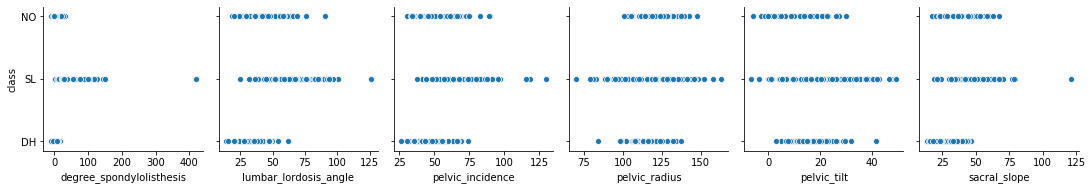

In [4]:
import seaborn as sns
pp = sns.pairplot(X, kind = "scatter", 
                  y_vars=['class'],
                  x_vars=X.columns.difference(['class']))
plt.show(pp)

In [5]:
#split data into training and test sets
train, test = model_selection.train_test_split(X, test_size = 0.33)
train_labels = train['class'].copy()
train = train.drop('class', axis = 1)
test_labels = test['class'].copy()
test = test.drop('class', axis = 1)

## 2. Logistic regression model

In [6]:
model = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial').fit(train, train_labels)

In [7]:
print('coef =\n', model.coef_)

coef =
 [[-0.03670372  0.05443168 -0.02958759 -0.07039788 -0.0579577  -0.09887239]
 [-0.00605166 -0.06054958  0.02428779  0.02463382  0.0566766  -0.12572707]
 [ 0.04275538  0.00611791  0.00529981  0.04576406  0.0012811   0.22459946]]


In [8]:
#print 10 samples from the train to show probabilities of each outcome
print(np.random.permutation(model.predict_proba(train).round(3))[:10])

[[0.83  0.161 0.009]
 [0.212 0.785 0.002]
 [0.    0.    1.   ]
 [0.012 0.004 0.984]
 [0.131 0.862 0.007]
 [0.887 0.096 0.017]
 [0.    0.    1.   ]
 [0.592 0.337 0.07 ]
 [0.021 0.216 0.764]
 [0.    0.    1.   ]]


### 3.1 Classification reports

In [9]:
print('THE TRAIN SET')
print(classification_report(model.predict(train), train_labels))

THE TRAIN SET
              precision    recall  f1-score   support

          DH       0.69      0.72      0.71        40
          NO       0.78      0.75      0.76        60
          SL       0.97      0.97      0.97       107

   micro avg       0.86      0.86      0.86       207
   macro avg       0.81      0.82      0.81       207
weighted avg       0.86      0.86      0.86       207



In [10]:
print('THE TEST SET')
print(classification_report(model.predict(test), test_labels))

THE TEST SET
              precision    recall  f1-score   support

          DH       0.72      0.72      0.72        18
          NO       0.81      0.89      0.85        38
          SL       0.98      0.89      0.93        47

   micro avg       0.86      0.86      0.86       103
   macro avg       0.84      0.84      0.84       103
weighted avg       0.87      0.86      0.87       103



### 3.2 Confusion matrices and accuracies

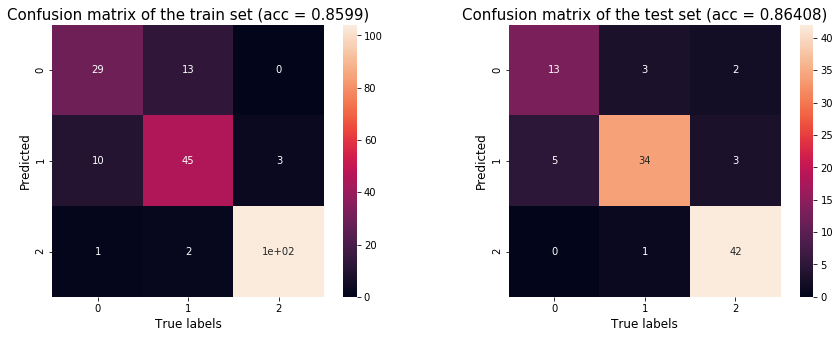

In [11]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1, aspect = 'equal')
sns.heatmap(confusion_matrix(model.predict(train), train_labels).T, annot = True, square = True)
plt.title("Confusion matrix of the train set (acc = " + str(round(accuracy_score(model.predict(train), train_labels),5)) + ')', size = 15)
plt.xlabel('True labels', size = 12)
plt.ylabel('Predicted', size = 12)

plt.subplot(1, 2, 2, aspect = 'equal')
sns.heatmap(confusion_matrix(model.predict(test), test_labels).T, annot = True, square = True)
plt.title("Confusion matrix of the test set (acc = " + str(round(accuracy_score(model.predict(test), test_labels),5)) + ')', size = 15)
plt.xlabel('True labels', size = 12)
plt.ylabel('Predicted', size = 12)

plt.show()